In [1]:
# Generic Libraries
from PIL import Image
import os
import pandas as pd
import numpy as np
import re,string,unicodedata

#Tesseract Library
import pytesseract

#Warnings
import warnings
warnings.filterwarnings("ignore")

#Garbage Collection
import gc

#Gensim Library for Text Processing
import gensim.parsing.preprocessing as gsp
from gensim import utils

#TextBlob Library (Sentiment Analysis)
from textblob import TextBlob, Word

#Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#WordCloud Generator
from wordcloud import WordCloud,STOPWORDS

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

## Some Exploration

In [3]:
sample_images = 'Sample Data Files'
test_images = 'new_dataset'


In [4]:
#Custom Function to Traverse the folder
def traverse(directory):
    path, dirs, files = next(os.walk(directory))
    fol_nm = os.path.split(os.path.dirname(path))[-1]
    print(f'Number of files found in "{fol_nm}" : ',len(files))

In [5]:
#Traversing the folders
#traverse(sample_images)
traverse(test_images)

Number of files found in "" :  52


## Extracting Text (the fun stuff !)

In [6]:
ex_txt = []   #list to store the extracted text

#Function to Extract Text
def TxtExtract(directory):
    """
    This function will handle the core OCR processing of images.
    """
    
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = subdir + os.sep + file
            text = pytesseract.image_to_string(Image.open(filepath), timeout=5)
            if not text:
                ex_txt.extend([[file, "blank"]])
            else:   
                ex_txt.extend([[file, text]])
                
    fol_nm = os.path.split(os.path.dirname(subdir))[-1]
    
    print(f"Text Extracted from the files in '{fol_nm}' folder & saved to list..")

In [7]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


#Extracting Text from JPG files in Sample Image Folder
#TxtExtract(sample_images)

#Extracting Text from JPG files
# Dataset Folder
TxtExtract(test_images)

Text Extracted from the files in '' folder & saved to list..


In [8]:
#Converting the list to dataframe for further analysis
ext_df = pd.DataFrame(ex_txt,columns=['FileName','Text'])

In [9]:
#Inspect the dataframe
ext_df

,FileName,Text
0,a0.png,Be yourself;\neveryone else is\nalready taken.\n
1,a1.png,You've gotta dance\nlike there's nobody\nwatch...
2,a2.png,Be the change that\nyou wish to see in the\nwo...
3,a3.png,No one can make you\nfeel inferior without\nyo...
4,a4.png,Live as if you were to\n\ndie tomorrow. Learn\...
5,a5.png,Darkness cannot\ndrive out darkness:\nonly lig...
6,a6.png,"Without music, life\nwould be a mistake.\n"
7,a7.png,We accept the love\nwe think we deserve.\n
8,a8.png,"Imperfection is\nbeauty, madness is\ngenius an..."
9,a9.png,There are only two\nways to live your life.\nO...


In [147]:
print("Total Records: ", ext_df.shape[0])

Total Records:  52


In [10]:
# Create list of pre-processing func (gensim)
processes = [
               gsp.strip_multiple_whitespaces
            ]

# Create func to pre-process text
def proc_txt(txt):
    text = txt
    text = utils.to_unicode(text)
    for p in processes:
        text = p(text)
    return text

In [11]:
#Creating a new column with processed text
ext_df['Text_Pr'] = ext_df['Text'].apply(lambda x: proc_txt(x))
ext_df.head()

,FileName,Text,Text_Pr
0,a0.png,Be yourself;\neveryone else is\nalready taken.\n,Be yourself; everyone else is already taken.
1,a1.png,You've gotta dance\nlike there's nobody\nwatch...,You've gotta dance like there's nobody watching
2,a2.png,Be the change that\nyou wish to see in the\nwo...,Be the change that you wish to see in the world.
3,a3.png,No one can make you\nfeel inferior without\nyo...,No one can make you feel inferior without your...
4,a4.png,Live as if you were to\n\ndie tomorrow. Learn\...,Live as if you were to die tomorrow. Learn as ...


In [12]:
from sklearn.metrics import accuracy_score
dt=pd.read_csv("quotes.csv")
dt['quote_pr'] = dt['quote'].apply(lambda x: proc_txt(x))
dt.head()

,index,quote,quote_pr
0,0,Be yourself; everyone else is already taken.,Be yourself; everyone else is already taken.
1,1,You've gotta dance like there's nobody watching,You've gotta dance like there's nobody watching
2,2,Be the change that you wish to see in the world.,Be the change that you wish to see in the world.
3,3,No one can make you feel inferior without your...,No one can make you feel inferior without your...
4,4,Live as if you were to die tomorrow. Learn as ...,Live as if you were to die tomorrow. Learn as ...


In [13]:
a=ext_df['Text_Pr'].values.tolist()
b=dt['quote_pr'].values.tolist()

In [14]:
a1=[]
b1=[]
for i in range(len(a)):
    t1=a[i].split()
    t2=b[i].split()
    a1.append(t1)
    b1.append(t2)

In [17]:
c=0
for i in range(len(a1)):
    if(a1[i]==b1[i]):
        c=c+1
acc=c/len(a1)
print("Accuracy:",round(acc*100,2),"%")

Accuracy: 86.54 %


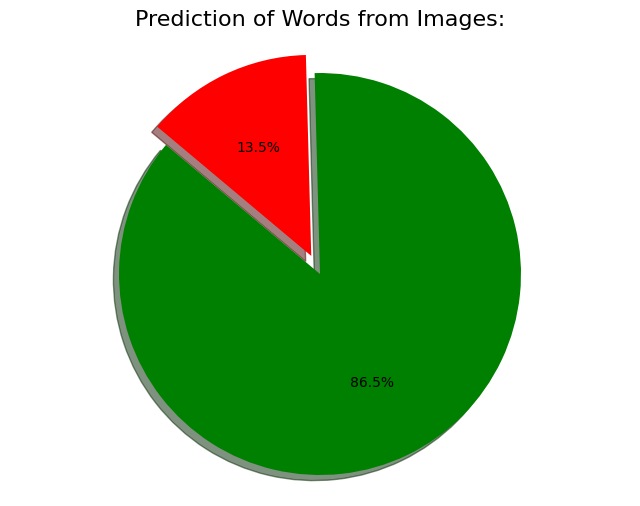

In [182]:
sizes = [(acc*100),100-(acc*100)]
colors = ['green', 'red']
explode = (0.1, 0)  # explode 1st slice
fig = plt.figure(figsize=[8, 6])

# Plot
plt.pie(sizes, explode=explode,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Prediction of Words from Images:", fontsize=16)
plt.show()

## Extracted Text Processing

In [157]:
# Create list of pre-processing func (gensim)
processes = [
               gsp.strip_tags, 
               gsp.strip_punctuation,
               gsp.strip_multiple_whitespaces,
               gsp.strip_numeric,
               gsp.remove_stopwords, 
               gsp.strip_short, 
               gsp.stem_text
            ]

# Create func to pre-process text
def proc_txt(txt):
    text = txt.lower()
    text = utils.to_unicode(text)
    for p in processes:
        text = p(text)
    return text

In [158]:
#Creating a new column with processed text
ext_df['Text_Pr'] = ext_df['Text'].apply(lambda x: proc_txt(x))
ext_df.head()

,FileName,Text,Text_Pr
0,a0.png,Be yourself;\neveryone else is\nalready taken.\n,taken
1,a1.png,You've gotta dance\nlike there's nobody\nwatch...,gotta danc like watch
2,a2.png,Be the change that\nyou wish to see in the\nwo...,chang wish world
3,a3.png,No one can make you\nfeel inferior without\nyo...,feel inferior consent
4,a4.png,Live as if you were to\n\ndie tomorrow. Learn\...,live die tomorrow learn live forev


In [159]:
#Creating a seperate dataframe with non-blank Text 
ext_df_txt = ext_df[(  ext_df['Text_Pr'] != 'blank'  )]

In [160]:
print("Total Records in Text Only Dataframe: ", ext_df_txt.shape[0])

Total Records in Text Only Dataframe:  52


## Sentiment Analysis

In [161]:
# Creating a function to analyse the tweet sentiments

def sentiment_analyzer(text):
    TB_sentiment_polarity = TextBlob(text).sentiment.polarity
    
    # decide sentiment as positive, negative and neutral 
    if TB_sentiment_polarity >= 0.00 : 
        return "Positive" 
  
    elif TB_sentiment_polarity <= 0.00 : 
        return "Negative" 
  
    else : 
        return "Neutral"

In [162]:
#Analysing the sentiment
ext_df_txt['Sentiment'] = ext_df_txt['Text_Pr'].apply(lambda x: sentiment_analyzer(x))

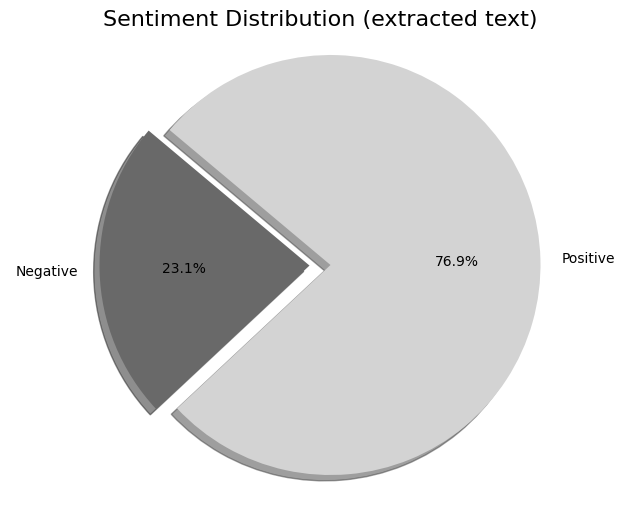

In [163]:
sentiment_count = ext_df_txt.groupby('Sentiment').size()

# Data to plot
labels = 'Negative', 'Positive'
sizes = [sentiment_count[0], sentiment_count[1]]
colors = ['dimgrey', 'lightgray']
explode = (0.1, 0)  # explode 1st slice
fig = plt.figure(figsize=[8, 6])

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Sentiment Distribution (extracted text)", fontsize=16)
plt.show()

## Word Cloud

In [164]:
# Function to plot word cloud
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(12.0,12.0), 
                   title = None, title_size=18, image_color=False):

    wordcloud = WordCloud(background_color='white',
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    
    if image_color:
        #image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'center'})
    plt.axis('off');
    plt.tight_layout()  


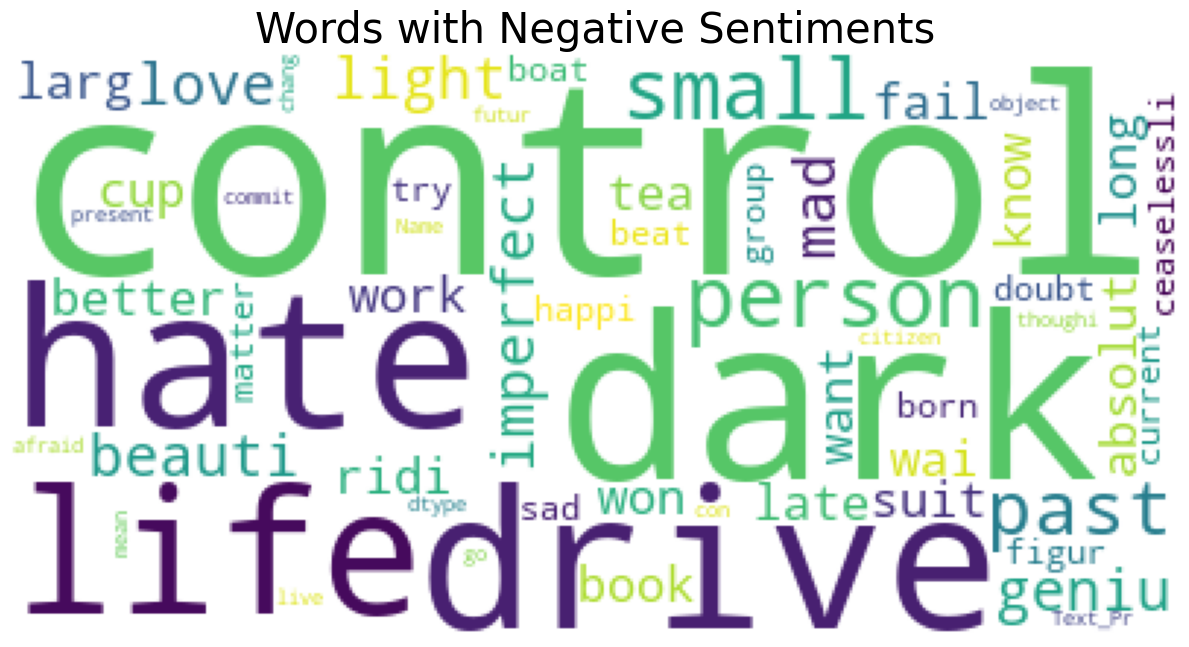

In [165]:
txt = str( ext_df_txt[ext_df_txt['Sentiment'] == 'Negative'].Text_Pr )
plot_wordcloud(txt, max_words=200, max_font_size=100, 
               title = 'Words with Negative Sentiments', title_size=30)

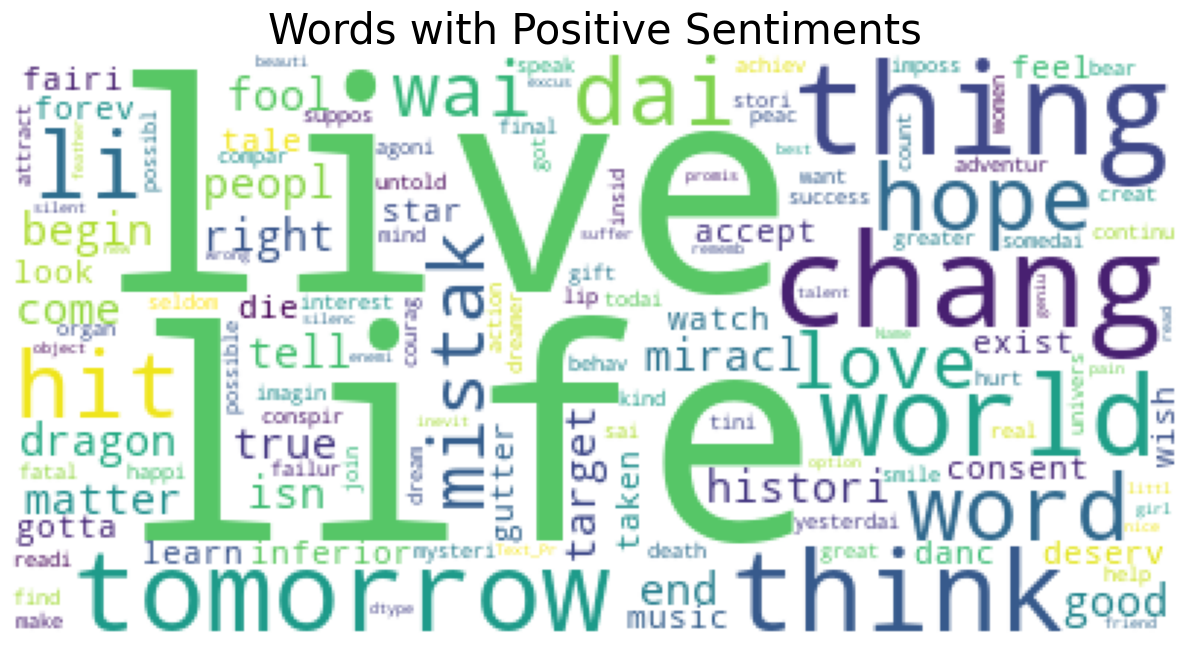

In [166]:
txt = str( ext_df_txt[ext_df_txt['Sentiment'] == 'Positive'].Text_Pr )
plot_wordcloud(txt, max_words=200, max_font_size=100, 
               title = 'Words with Positive Sentiments', title_size=30)

In [167]:
#Free up memory
gc.collect()

11240